## Task Description

The document provides real data for one of the projects for cohorts who installed the game from 21.09.23 to 28.09.23.

Based on this data, hypothesize how revenue grows in the first month of a user's game life.
How many times will the revenue of the zero day (the day of the game's installation), the first and the third day increase by the 30th day?

In [6]:
pip install pandas
pip install matplotlib
pip install scipy

import sys 

!{sys.executable} -m pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [55]:
import pandas as pd

file_path = './Ad_revenue.xlsx'

#Read data from the list 'ad revenue'
with pd.ExcelFile(file_path) as xls:
    ad_revenue_data = pd.read_excel(xls, 'ad revenue')

ad_revenue_data.head()

,install_date,event_date,event_revenue,platform,user_id
0,2023-09-21,2023-09-21,0.316470,android,1695339148585-8391306266630234966
1,2023-09-21,2023-09-21,0.063103,android,1695280270975-5411644856462553821
2,2023-09-21,2023-09-21,0.316470,android,1695317488398-8939481192662600393
3,2023-09-21,2023-09-21,0.054710,android,1695317488398-8939481192662600393
4,2023-09-21,2023-09-21,0.024880,android,1695280270975-5411644856462553821


In [50]:
#Read data from the list 'installs data'
with pd.ExcelFile(file_path) as xls:
    installs_data = pd.read_excel(xls, 'installs data')

installs_data.head()

,install_date,installs,platform
0,2023-09-21,1,android
1,2023-09-21,0,android
2,2023-09-21,47,android
3,2023-09-21,0,android
4,2023-09-21,0,android


In [59]:
#Checking for empty values 
na_count = ad_revenue_data['event_revenue'].isna().sum()
print(na_count)

na_count = ad_revenue_data['install_date'].isna().sum()
print(na_count)

na_count = ad_revenue_data['event_date'].isna().sum()
print(na_count)

na_count = installs_data['install_date'].isna().sum()
print(na_count)

na_count = installs_data['installs'].isna().sum()
print(na_count)

911
0
0
0
0


In [60]:
#The median value of the event_revenue column, excluding empty values
median_revenue = ad_revenue_data['event_revenue'].median()
print (median_revenue)

#Replace empty values with the median value
ad_revenue_data['event_revenue'].fillna(median_revenue, inplace=True)

#Checking for empty values
na_count = ad_revenue_data['event_revenue'].isna().sum()
print(na_count)

0.0520515
0


In [45]:
# Aggregating count of installs by date from the list installs data
agr_installs = installs_data.groupby('install_date', as_index=False)['installs'].sum()
agr_installs.head()

,install_date,installs
0,2023-09-21,718
1,2023-09-22,671
2,2023-09-23,693
3,2023-09-24,891
4,2023-09-25,1349


In [62]:
# Aggregating data from the list ad revenue data by cohorts - 'install_date' and 'age'

# Cohort age calculation
# Calculating the difference in days between event_date and install_date
ad_revenue_data['age'] = (ad_revenue_data['event_date'] - ad_revenue_data['install_date']).dt.days 

# Calculating sum 'event_revenue' by cohorts
total_revenue_by_cohort = ad_revenue_data.groupby(['install_date','age'], as_index=False)['event_revenue'].sum()

merged_data = pd.merge(total_revenue_by_cohort, agr_installs, on='install_date', how='left')

# Calculating arpu for every sub cohorts age
merged_data['arpu'] = merged_data['event_revenue'] / merged_data['installs']
merged_data.head()

,install_date,age,event_revenue,installs,arpu
0,2023-09-21,0,252.465737,718,0.351624
1,2023-09-21,1,91.346231,718,0.127223
2,2023-09-21,2,56.714017,718,0.078989
3,2023-09-21,3,41.387201,718,0.057642
4,2023-09-21,4,33.767638,718,0.047030


<Axes: xlabel='age'>

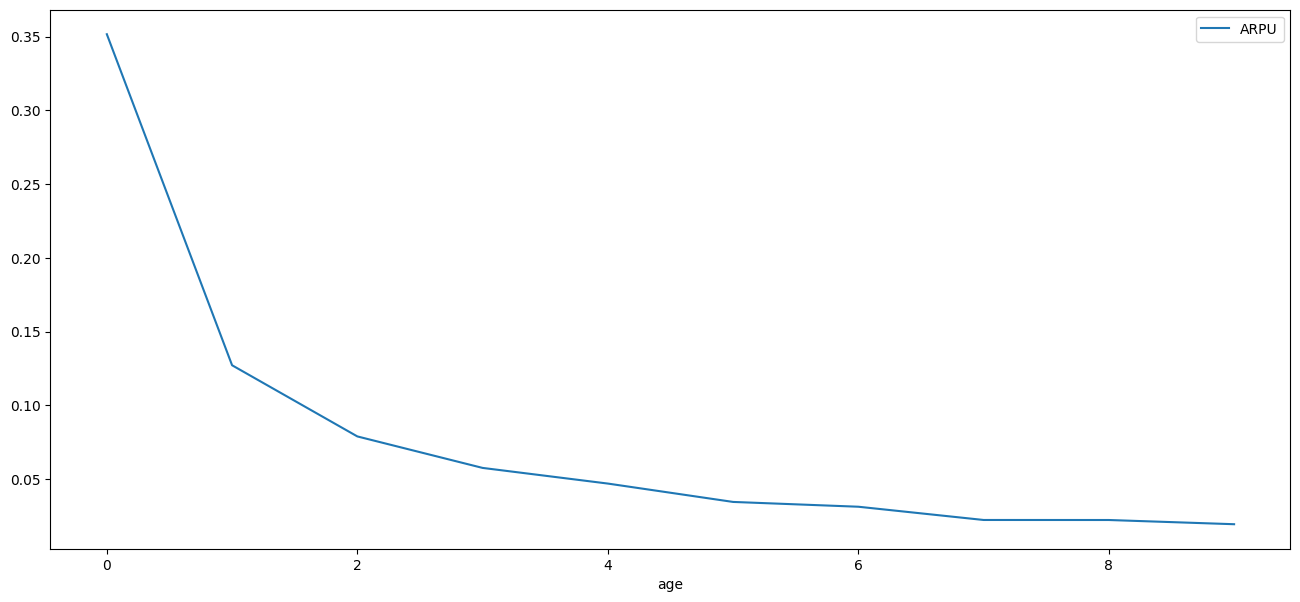

In [38]:
# Data visualisation for cohort of users who installed our app on "2023-09-21"
merged_data.query('install_date=="2023-09-21"').plot('age', 'arpu', figsize=(16, 7))

In [44]:
# Aggregating merged_data by sub chorts 'age' and calculating 'average_arpu' for every sub chorts 'age' accordingly
average_arpu_data = merged_data.groupby('age', as_index=False)['arpu'].mean()
average_arpu_data.rename(columns={'arpu': 'average_arpu'}, inplace=True)
average_arpu_data

,age,average_arpu
0,0,0.467188
1,1,0.187993
2,2,0.107656
3,3,0.084781
4,4,0.068071
5,5,0.049444
6,6,0.042127
7,7,0.034297
8,8,0.032133
9,9,0.019472


<Axes: xlabel='age'>

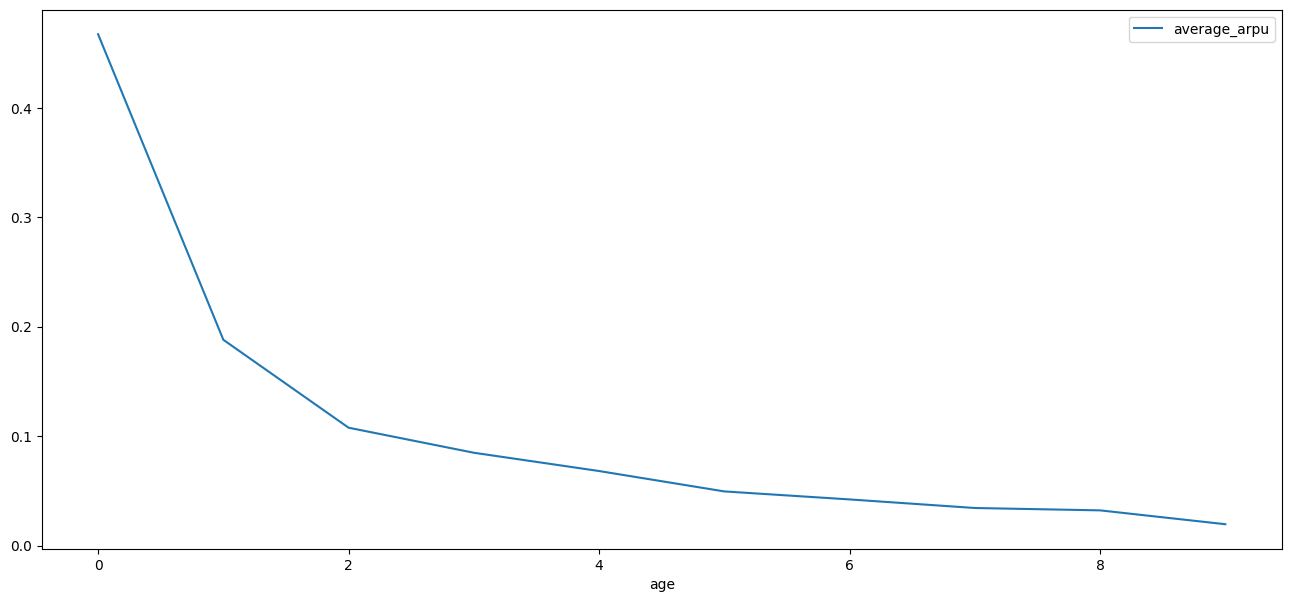

In [45]:
average_arpu_data.plot('age', 'average_arpu', figsize=(16, 7))

In [ ]:
# We observe that data visualisation for cohort of users who installed our app on "2023-09-21" 
# and data visualisation of 'average_arpu' for every sub chorts 'age' 
# both close to the form of hyperbola function



# THUS, USER REVENUE EXHIBITS A HYPERBOLIC DECREASE DURING THE FIRST MONTH

In [23]:
# selected function is y = a / (x + b) + c

# Using the curve fitting procedure, calculating the best fit parameters a, b, c of the selected model y = a / (x + b) + c 
# To fit a curve to the series of data points representing 'age' and 'average_arpu'.
from scipy.optimize import curve_fit

# Provided data
age_data = average_arpu_data['age']
arpu_data = average_arpu_data['average_arpu']

# Function to fit the data
def fit_function(x, a, b, c):
    return a / (x + b) + c

# Initial guess for the parameters
initial_guess = [1, 1, 1]

# Fit the function to the data
params, params_covariance = curve_fit(fit_function, age_data, arpu_data, p0=initial_guess)

# Print the found parameters
params

array([ 0.33153857,  0.69717732, -0.00839837])

In [29]:
# Prediction for the 'age' = 30
age_to_predict = 30
predicted_arpu = fit_function(age_to_predict, *params)
predicted_arpu

0.002401925670642867

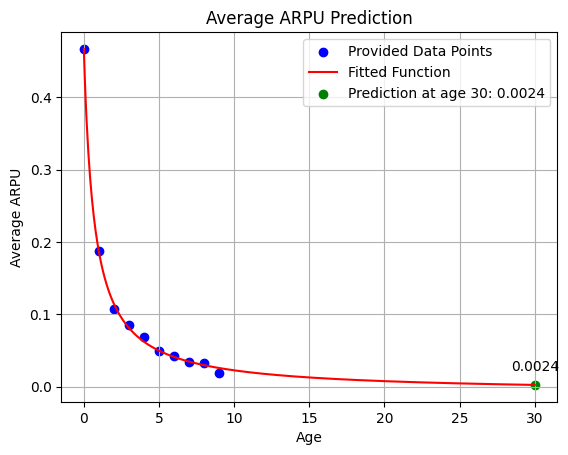

In [28]:
#Displaying the graph image

import matplotlib.pyplot as plt
import numpy as np

# Plot the provided data points
plt.scatter(age_data, arpu_data, label='Provided Data Points', color='blue')

# Generate a smooth curve for the fitted function
x_smooth = np.linspace(min(age_data), age_to_predict, 500)
y_smooth = fit_function(x_smooth, *params)

# Plot the smooth curve of the fitted function
plt.plot(x_smooth, y_smooth, label='Fitted Function', color='red')

# Mark the prediction at age 30
plt.scatter(age_to_predict, predicted_arpu, label=f'Prediction at age 30: {predicted_arpu:.4f}', color='green')

# Annotate the predicted point
plt.annotate(f'{predicted_arpu:.4f}', 
             (age_to_predict, predicted_arpu),
             textcoords="offset points", 
             xytext=(0,10), 
             ha='center')

plt.title('Average ARPU Prediction')
plt.xlabel('Age')
plt.ylabel('Average ARPU')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
day30_to_day0 = average_arpu_data['average_arpu'][0] / predicted_arpu
day30_to_day1 = average_arpu_data['average_arpu'][1] / predicted_arpu
day30_to_day3 = average_arpu_data['average_arpu'][3] / predicted_arpu
(day30_to_day0, day30_to_day1, day30_to_day3)

(194.50575413242547, 78.26753007605535, 35.29720807989347)

In [ ]:
#THUS, AGE_0/AGE_30 = 194.5, AGE_1/AGE_30 = 78.3, AGE_3/AGE_30 = 35.3